- 説明変数Xのshapeは(データ数, 次元数)の形でなければならない。
- 目的変数yのshapeは(データ数, )の形でなければならない。

In [49]:
import physbo
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
seed=0

In [51]:
def func(x):
    return np.sin(x).reshape(-1)

In [52]:
# データセットの作成
x_range = (0,4)
x_len = 10 # xの個数
X = np.array([random.uniform(x_range[0],x_range[1]) for i in range(x_len)])
X=X.reshape(-1,1)
y = func(X)

Text(0.5, 1.0, 'True function and Data set points')

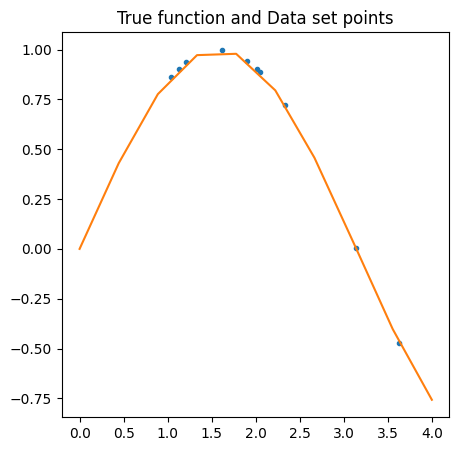

In [53]:
plt.figure(figsize=(5,5))

plt.plot(X, y, ".")
plt.plot(np.linspace(x_range[0],x_range[1],x_len),func(np.linspace(x_range[0],x_range[1],x_len)))

plt.title("True function and Data set points")

In [54]:
# ランダムサーチを行う。

random.seed(seed)
calculated_ids = random.sample(range(y.size), 3)
print(calculated_ids)
y_initial = y[calculated_ids]

[6, 9, 0]


In [55]:
# policyのセット
policy = physbo.search.discrete.policy(test_X=physbo.misc.centering(X), initial_data=[calculated_ids, y_initial])

# シード値のセット
policy.set_seed(0)

In [56]:
class simulator:
    def __call__(self, action):
        return y[action]

In [57]:
res = policy.bayes_search(max_num_probes=x_len-(3+1), simulator=simulator(), score="TS", interval=1,  num_rand_basis = 5000)

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood -3.788075380519605
50 -th epoch marginal likelihood -3.832497329126924
100 -th epoch marginal likelihood -3.8527373592047556
150 -th epoch marginal likelihood -3.8710151754338127
200 -th epoch marginal likelihood -3.887310663761909
250 -th epoch marginal likelihood -3.90151771720391
300 -th epoch marginal likelihood -3.91362472777052
350 -th epoch marginal likelihood -3.92370034829547
400 -th epoch marginal likelihood -3.931880094003904
450 -th epoch marginal likelihood -3.938350822544982
500 -th epoch marginal likelihood -3.9433332353237494
Done

0004-th step: f(x) = 0.936759 (action=4)
   current best f(x) = 0.936759 (best action=4) 

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood -6.286650222402195
50 -th epoch marginal likelihood -6.411226124130288
100 -th epoch marginal likelihood 

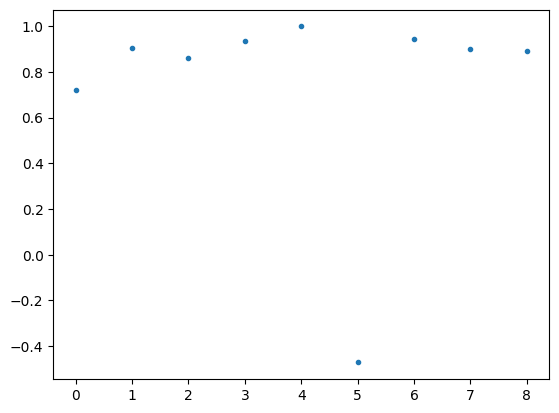

In [58]:
# 探索点
plt.plot(res.fx[0:res.total_num_search],".")

0.9988026662970091


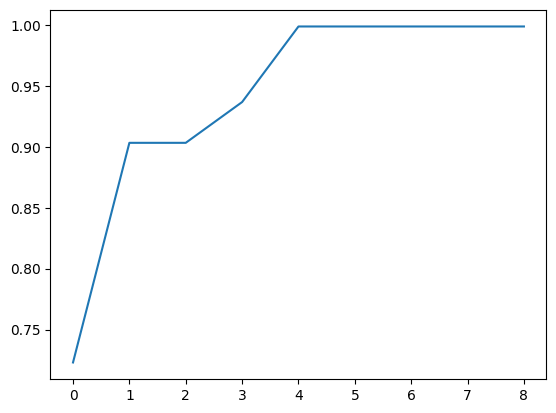

In [59]:
# 探索中の最大値
best_fx, best_action = res.export_all_sequence_best_fx()
plt.plot(best_fx)
print(best_fx[-1])

保存すべきは2つ。
- res.fx (目的関数の評価値の履歴)
- res.chosen_actions (目的関数を評価した時のaction IDの履歴)
    - action IDは0から始まる。データセットのインデックスとして機能する。

- resを丸ごとsaveすることができるらしい。

In [62]:
res.save("/workspace/PHYSBO/res.npz")

In [64]:
res2 = physbo.search.discrete.results.history()
res2.load("/workspace/PHYSBO/res.npz")

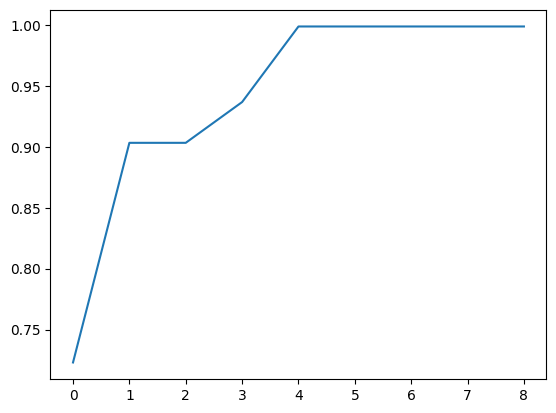

In [65]:
best_fx, _ = res.export_all_sequence_best_fx()
plt.plot(best_fx)